In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import pickle

In [ ]:
# Load the model
filename = '../Models/fraud_model.pkl'
rf_fraud = pickle.load(open(filename, 'rb'))

In [3]:
df_fraud=pd.read_csv('../Data/preprocessed.csv')
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,hour_of_day,day_of_week,...,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe
0,2,2015-01-11 03:47:13,2015-02-21 10:03:37,0.310345,FGBQNDNBETFJJ,0.120690,880217484,0,10,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,2015-06-02 16:40:57,2015-09-26 21:32:16,0.220690,MKFUIVOHLJBYN,0.344828,2785906106,0,21,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,2015-05-28 07:53:06,2015-08-13 11:53:07,0.262069,SCQGQALXBUQZJ,0.120690,356056736,0,11,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12,2015-01-10 06:25:12,2015-03-04 20:56:37,0.179310,MSNWCFEHKTIOY,0.017241,2985180352,0,20,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16,2015-02-03 13:48:23,2015-03-12 12:46:23,0.000000,FROZWSSWOHZBE,0.241379,578312545,0,12,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
def preprocess_fraud_data(df):
    df['signup_time'] = pd.to_datetime(df['signup_time'])
    df['purchase_time'] = pd.to_datetime(df['purchase_time'])
    df = df.drop(['signup_time', 'purchase_time', 'user_id', 'device_id'], axis=1)
    return df

df_fraud = preprocess_fraud_data(df_fraud)

In [8]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
df_fraud = pd.DataFrame(imputer.fit_transform(df_fraud), columns=df_fraud.columns)

In [9]:
# Ensure target variables are binary
df_fraud['class'] = df_fraud['class'].astype(int)

In [10]:
# Separate features and target for Fraud_Data
X_fraud = df_fraud.drop('class', axis=1)
y_fraud = df_fraud['class']

# Train-test split for Fraud_Data
X_fraud_train, X_fraud_test, y_fraud_train, y_fraud_test = train_test_split(X_fraud, y_fraud, test_size=0.3, random_state=42)

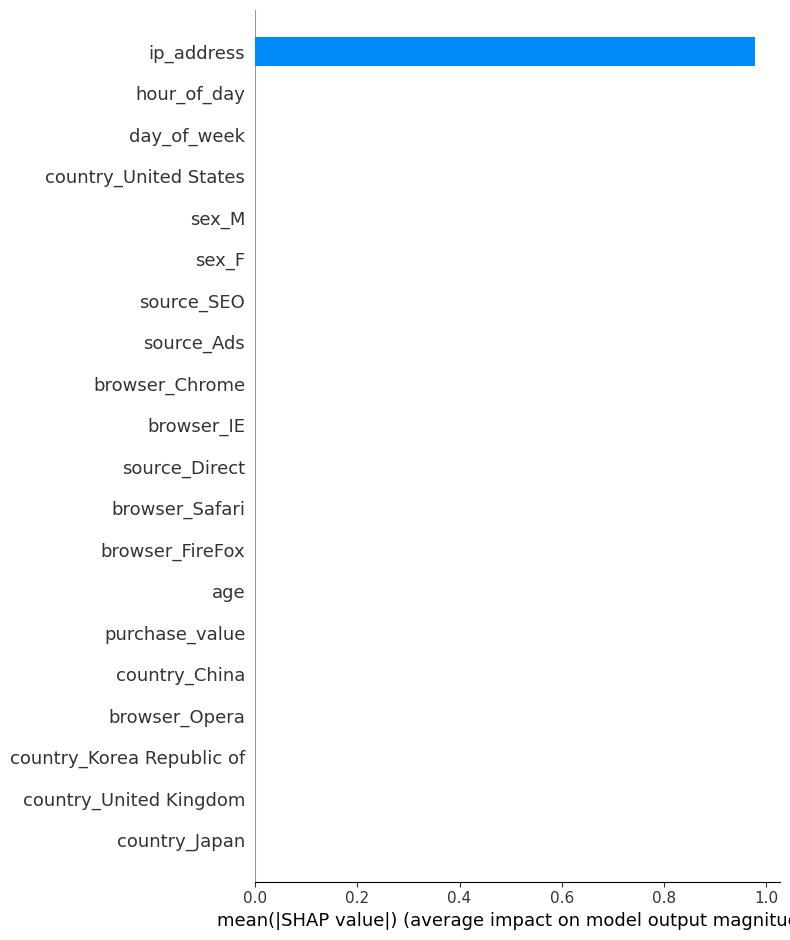

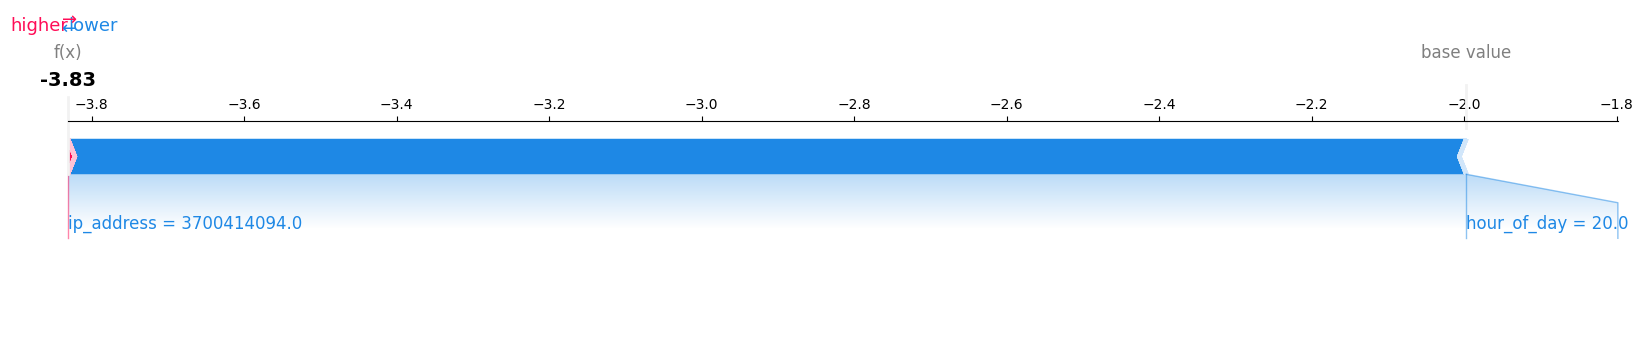

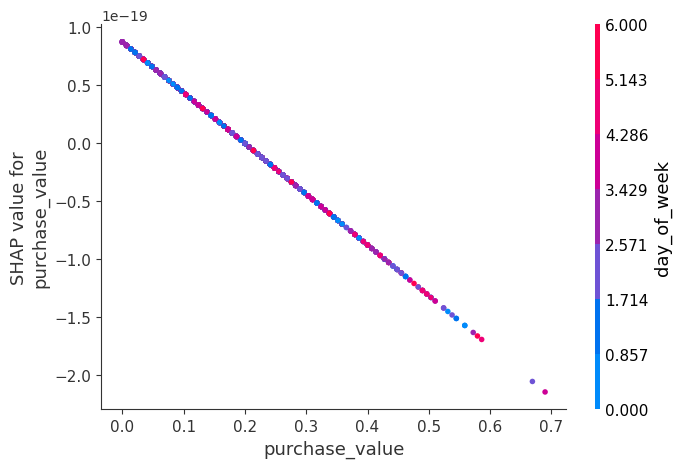

In [35]:
import shap
import matplotlib.pyplot as plt

# Create an explainer for the random forest model on fraud detection
explainer = shap.Explainer(rf_fraud, X_fraud_test)
shap_values = explainer(X_fraud_test)

# Summary Plot
shap.summary_plot(shap_values, X_fraud_test, plot_type="bar")

# Force Plot for a single prediction (updated)
# Select a single instance from the dataset to explain
instance_index = 0

# Get the expected value and the SHAP values for the selected instance
expected_value = explainer.expected_value
shap_value = shap_values[instance_index]

# Generate the force plot
shap.force_plot(expected_value, shap_value.values, X_fraud_test.iloc[instance_index], matplotlib=True)

# Dependence Plot for a specific feature
feature_idx = 0  # Change this to the index of the feature you're interested in
shap.dependence_plot(feature_idx, shap_values.values, X_fraud_test)


In [37]:
from lime.lime_tabular import LimeTabularExplainer

# Function to explain models using SHAP
def explain_model_with_shap(model, X_test, model_name):
    explainer = shap.Explainer(model, X_test)
    shap_values = explainer(X_test)

    # Summary Plot
    plt.title(f'SHAP Summary Plot for {model_name}')
    shap.summary_plot(shap_values, X_test, plot_type="bar")
    plt.show()

    # Force Plot for a single prediction (updated)
    instance_index = 0
    expected_value = explainer.expected_value
    shap_value = shap_values[instance_index]
    plt.title(f'SHAP Force Plot for {model_name}')
    shap.force_plot(expected_value, shap_value.values, X_test.iloc[instance_index], matplotlib=True)
    plt.show()

    # Dependence Plot for a specific feature
    feature_idx = 0  # Change this to the index of the feature you're interested in
    plt.title(f'SHAP Dependence Plot for {model_name}')
    shap.dependence_plot(feature_idx, shap_values.values, X_test)
    plt.show()

# Function to explain models using LIME
def explain_model_with_lime(model, X_train, X_test, model_name):
    explainer = LimeTabularExplainer(
        training_data=X_train.values,
        feature_names=X_train.columns,
        class_names=['Not Fraud', 'Fraud'],
        mode='classification'
    )

    # Choose an instance to explain
    instance_idx = 0
    instance = X_test.iloc[instance_idx]

    # Explain the instance
    explanation = explainer.explain_instance(
        data_row=instance,
        predict_fn=model.predict_proba
    )

    # Show the explanation
    plt.title(f'LIME Explanation for {model_name}')
    explanation.show_in_notebook(show_table=True)
    plt.show()

    # Plot the explanation
    plt.title(f'LIME Explanation Plot for {model_name}')
    explanation.as_pyplot_figure()
    plt.show()




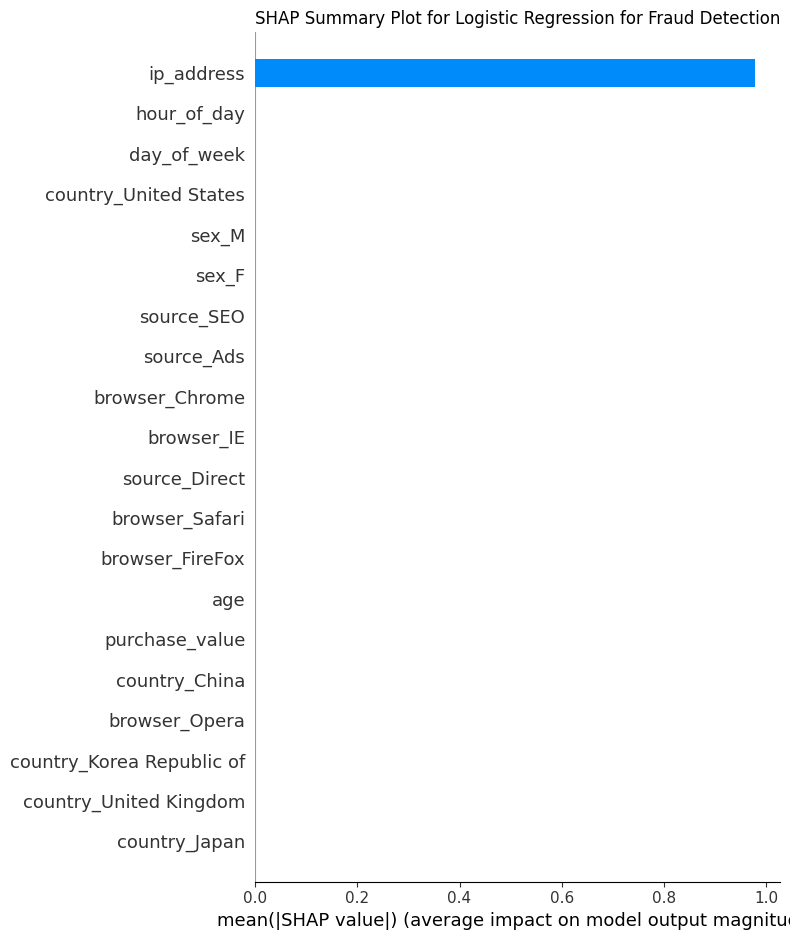

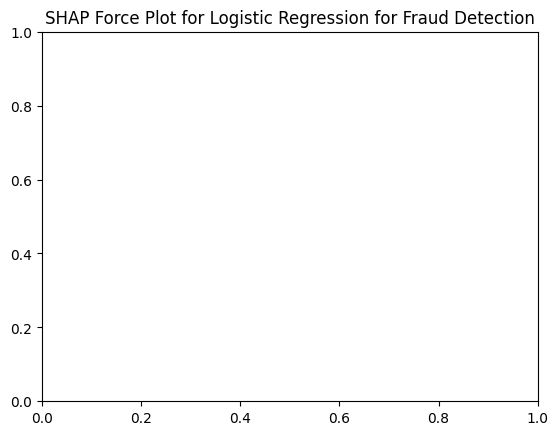

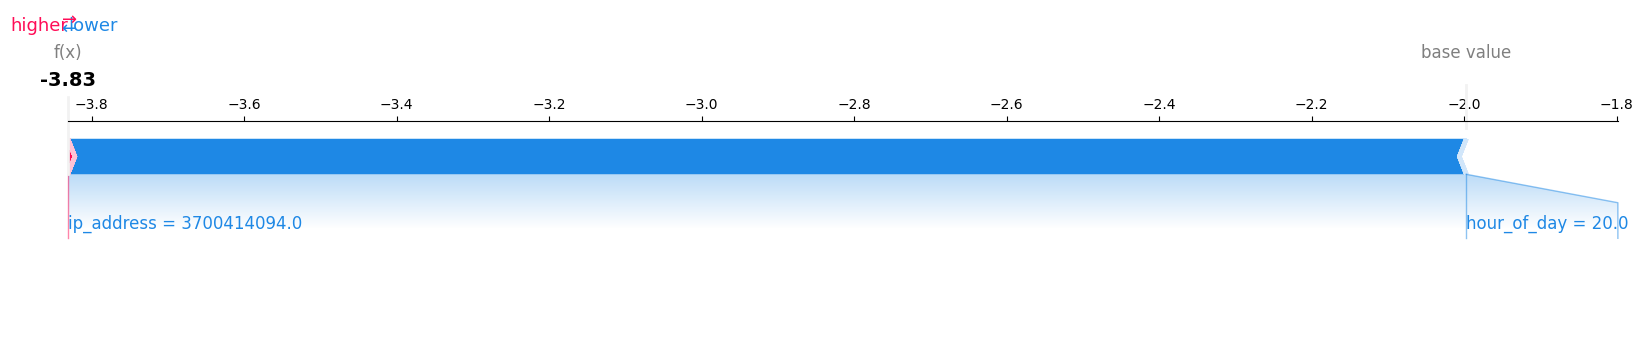

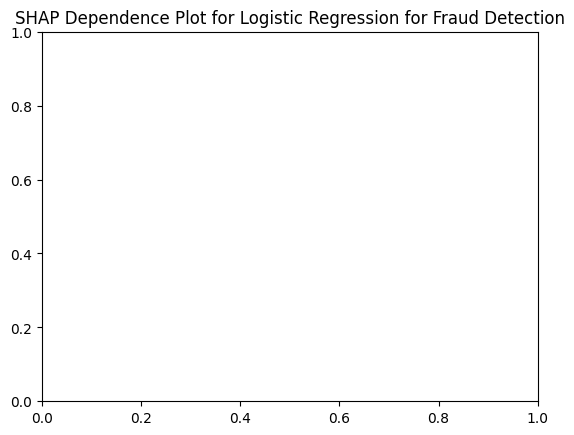

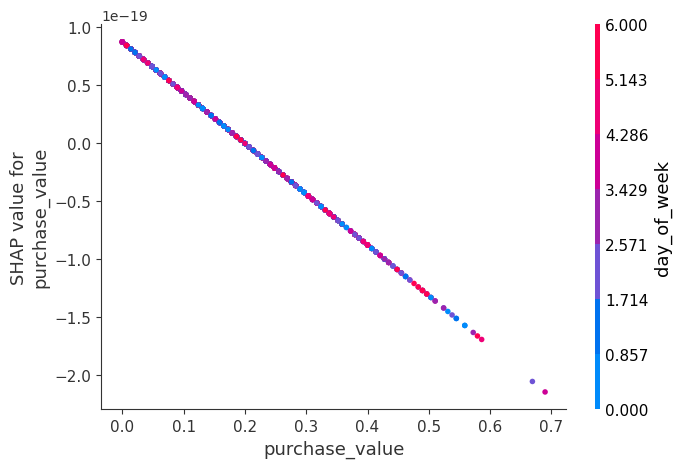

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


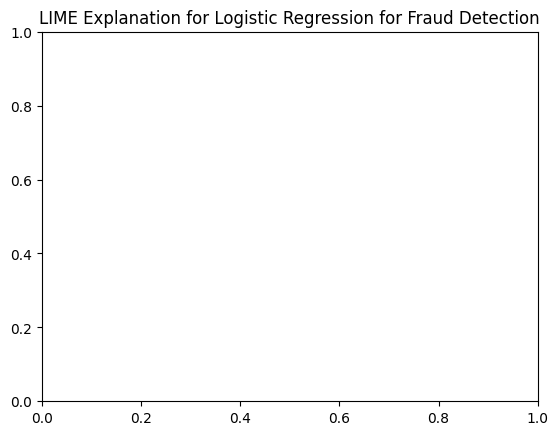

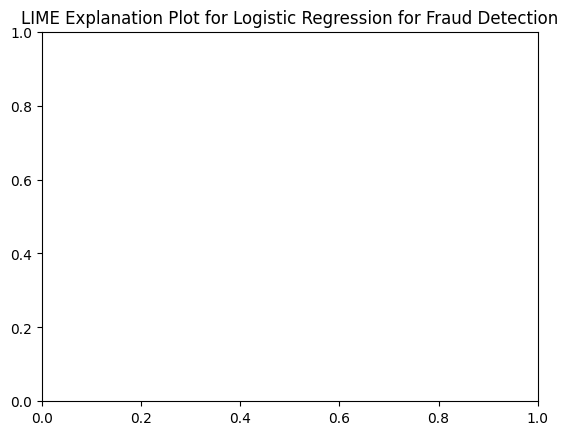

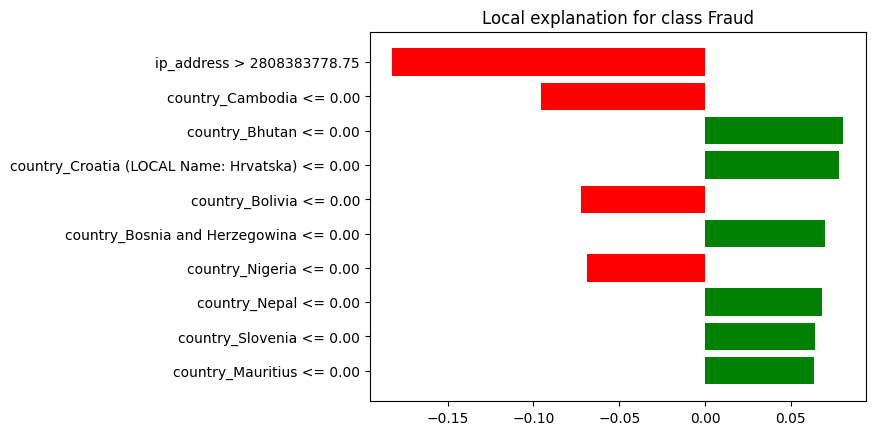

In [38]:
# Using SHAP to explain the logistic regression model for fraud detection
explain_model_with_shap(rf_fraud, X_fraud_test, "Logistic Regression for Fraud Detection")

# Using LIME to explain the logistic regression model for fraud detection
explain_model_with_lime(rf_fraud, X_fraud_train, X_fraud_test, "Logistic Regression for Fraud Detection")